In [19]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import os
import cv2
import random
import pickle

In [2]:
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
# General directory
DATADIR = "c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/"

# Categories for neural network to detect
CATEGORIES = ['cardboard', 'glass', 'metal',
              'paper', 'plastic', 'trash']

cardboard_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/cardboard'
glass_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/glass'
metal_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/metal'
paper_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/paper'
plastic_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/plastic'
trash_dir = 'c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data/trash'

In [4]:
# Function to assign labels to images
def assign_label(img, debris_type):
    return debris_type

In [5]:
# Function to be used to create training data for each image directory
train_images = []
train_labels = []

img_size = 75

def make_train_data(debris_type, DATADIR):
    for img in os.listdir(DATADIR):
        label = assign_label(img, debris_type)
        path = os.path.join(DATADIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size, img_size))

        train_images.append(np.array(img))
        train_labels.append(str(label))

In [6]:
# Cardboard training data
make_train_data('cardboard', cardboard_dir)
print(len(train_images))

402


In [7]:
make_train_data('glass', glass_dir)
print(len(train_images))

903


In [8]:
make_train_data('metal', metal_dir)
print(len(train_images))

1313


In [9]:
make_train_data('paper', paper_dir)
print(len(train_images))

1907


In [10]:
make_train_data('plastic', plastic_dir)
print(len(train_images))

2389


In [11]:
make_train_data('trash', trash_dir)
print(len(train_images))

2526


In [43]:
# Verifying shape of X array
train = np.array(train_images)
train = train/255.0
train.shape

(2526, 75, 75, 3)

In [44]:
train[0, :, :]

array([[[0.66666667, 0.80392157, 0.96078431],
        [0.65882353, 0.79607843, 0.95294118],
        [0.66666667, 0.78431373, 0.94509804],
        ...,
        [0.49019608, 0.60392157, 0.77647059],
        [0.58823529, 0.70196078, 0.8745098 ],
        [0.56470588, 0.67843137, 0.85098039]],

       [[0.65882353, 0.79607843, 0.95294118],
        [0.65882353, 0.79607843, 0.95294118],
        [0.66666667, 0.78431373, 0.94509804],
        ...,
        [0.48627451, 0.6       , 0.77254902],
        [0.56078431, 0.67843137, 0.84705882],
        [0.57254902, 0.68627451, 0.85882353]],

       [[0.6627451 , 0.8       , 0.95686275],
        [0.6627451 , 0.8       , 0.95686275],
        [0.67843137, 0.79607843, 0.95686275],
        ...,
        [0.50588235, 0.61960784, 0.79215686],
        [0.55294118, 0.67058824, 0.83921569],
        [0.54509804, 0.65882353, 0.83137255]],

       ...,

       [[0.43137255, 0.53333333, 0.69019608],
        [0.45490196, 0.55686275, 0.69019608],
        [0.43529412, 0

In [28]:
# Verifying shape of labels array
# labels = np.array(train_labels)
# train_labels.shape

In [25]:
# Extract the labels
label_dummies = pd.get_dummies(train_labels)
labels = label_dummies.values.argmax(1)
labels

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [24]:
pd.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int64)

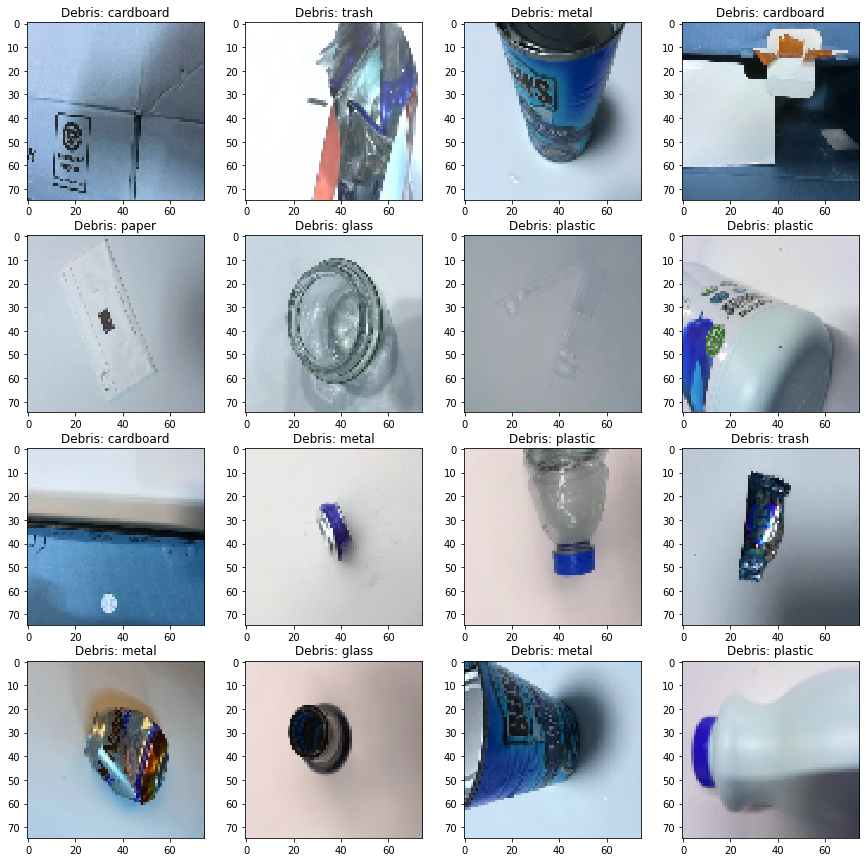

In [31]:
# Visualize random images
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(15,15)

for j in range(4):
    for k in range(4):
        image = np.random.randint(0, len(labels))
        ax[j, k].imshow(train[image])
        ax[j, k].set_title('Debris: ' + labels[image])
        
plt.show(image)

In [13]:
# Encoding the Y array
# from keras.utils import to_categorical

# labelEncoder = LabelEncoder()
# y = labelEncoder.fit_transform(Z)
# y = to_categorical(y, 6)

Using TensorFlow backend.


In [29]:
# X_train, y_train, X_test, y_test = train_test_split(train, labels, test_size=0.30, random_state=42)

In [32]:
# print('X_train shape: ', X_train.shape)
# print('y_train shape: ', y_train.shape)
# print('X_test shape: ', X_test.shape)
# print('y_test shape: ', y_test.shape)

In [33]:
# Shuffle the labels and images randomly for better results
union_list = list(zip(train, labels))
random.shuffle(union_list)
train, labels = zip(*union_list)

# Convert the shuffled list to numpy array type
train = np.array(train)
labels = np.array(labels)

In [34]:
# Keras Dependencies
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten

In [35]:
# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (6, 6), input_shape = (img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

# Output layer with 6 neurons for 6 classes
model.add(Dense(6, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
# Compiling for the model for integer targets
model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        3488      
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        3

In [38]:
# Fit (Train) the model -- 10 iterations
history = model.fit(train, labels, epochs=10)

Epoch 1/10


ValueError: could not convert string to float: 'plastic'